In [95]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import csv
from tqdm import tqdm

import tensorflow as tf
from tensorflow import shape,math
from tensorflow.keras import Input,layers,Model
from tensorflow.keras.losses import mse,binary_crossentropy
from tensorflow.keras.utils import plot_model

import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [97]:
import os
import pandas as pd
import numpy as np

output_dir = os.path.join(".", "output_bw")  # Path to the output directory
subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
subdirs.sort()

# Create an empty 3D array to store the combined data
combined_arr = np.empty((len(subdirs),1000, 10))

# Loop through each subdirectory and load the CSV files
for i, subdir in enumerate(subdirs):
    action_filename = os.path.join(subdir, "action.csv")
    obs_filename = os.path.join(subdir, "obs.csv")

    # Load the action and obs CSV files
    action_df = pd.read_csv(action_filename,  header=None)
    obs_df = pd.read_csv(obs_filename,  header=None)

    # Concatenate the DataFrames horizontally
    combined_data = pd.concat([action_df, obs_df], axis=1)

    # Convert combined_data to a 3D array and assign it to combined_arr
    combined_arr[i] = np.reshape(combined_data.values, (1000, 10))

# Print the shape of combined_arr
print(combined_arr.shape)


(10000, 1000, 10)


In [64]:
# flattened_arr = combined_arr.reshape(10000, 9990)

In [65]:
# flattened_arr.shape

In [66]:
# import torch

# combined_df = np.array(combined_arr)
# combined_tensor = torch.from_numpy(combined_df)
# flattened_tensor = combined_tensor.flatten(start_dim=1)

In [67]:
# # Rename dimensions to 'Seed' and 'Data'
# flattened_tensor.names = ("Seed", "Data")

# # Now flattened_tensor will have dimensions named 'Seed' and 'Data'
# print(flattened_tensor.shape)  # Output: torch.Size([10000, 9990])
# print(flattened_tensor)

In [68]:
# len(flattened_tensor)

In [69]:
# import os
# import pandas as pd
# import numpy as np

# output_dir = os.path.join(".", "output_front")  # Path to the output directory
# subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
# subdirs.sort()

# # Create an empty 3D array to store the combined data
# combined_arr = np.empty((len(subdirs), 1000, 2))

# # Loop through each subdirectory and load the CSV files
# for i, subdir in enumerate(subdirs):
#     action_filename = os.path.join(subdir, "action.csv")

#     # Load the action and obs CSV files
#     action_df = pd.read_csv(action_filename,  header=None)

#     # Convert combined_data to a 3D array and assign it to combined_arr
#     combined_arr[i-1] = np.reshape(action_df.values, (1000, 2))

# # Print the shape of combined_arr
# print(combined_arr.shape)

In [98]:
combined_df = np.array(combined_arr)

In [99]:
from sklearn.preprocessing import MinMaxScaler
## 정규화하기

# Flatten the combined_arr to 2D
flattened_arr = combined_arr.reshape(-1, combined_arr.shape[-1])

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler and transform the data
normalized_arr = scaler.fit_transform(flattened_arr)

# Reshape the normalized data back to the original shape
normalized_arr = normalized_arr.reshape(combined_arr.shape)

# Print the shape of normalized_arr
print(normalized_arr.shape)

(10000, 1000, 10)


In [100]:
combined_df = np.array(combined_arr)

In [101]:
## 정규화 다시 되돌리기

# Flatten the normalized_arr to 2D
flattened_normalized_arr = normalized_arr.reshape(-1, normalized_arr.shape[-1])

# Use the inverse_transform method to transform the data back to its original state
original_arr = scaler.inverse_transform(flattened_normalized_arr)

# Reshape the original data back to the original shape
original_arr = original_arr.reshape(combined_arr.shape)

# Print the shape of original_arr
print(original_arr.shape)


(10000, 1000, 10)


In [102]:
print(np.allclose(original_arr, combined_arr))

True


# 정규화해서 해보기

In [21]:
import torch

combined_df = np.array(combined_arr)
combined_tensor = torch.from_numpy(combined_df)
normalized_tensor = torch.from_numpy(normalized_arr)

====> Epoch: 1 Average loss: 0.0061700812918799265, Recon Loss: 0.001553694133247648, KL Div: 0.004616387162889753
====> Epoch: 2 Average loss: 0.00406731630223138, Recon Loss: 0.0015520020638193402, KL Div: 0.0025153142639568874
====> Epoch: 3 Average loss: 0.0023811748708997453, Recon Loss: 0.001549322749887194, KL Div: 0.000831852125270026
====> Epoch: 4 Average loss: 0.001696217485836574, Recon Loss: 0.0015460416844912937, KL Div: 0.00015017580134528023
====> Epoch: 5 Average loss: 0.0015685371330806186, Recon Loss: 0.0015424901459898267, KL Div: 2.6046987090791975e-05
====> Epoch: 6 Average loss: 0.0015480633548327855, Recon Loss: 0.0015387595806803022, KL Div: 9.303774152483259e-06
====> Epoch: 7 Average loss: 0.0015420304494244712, Recon Loss: 0.0015346804005759102, KL Div: 7.350048848560878e-06
====> Epoch: 8 Average loss: 0.001536122999020985, Recon Loss: 0.0015303090683051518, KL Div: 5.8139307158333916e-06
====> Epoch: 9 Average loss: 0.0015304096341133117, Recon Loss: 0.001

====> Epoch: 71 Average loss: 0.0003738940028207643, Recon Loss: 0.0003735639165554728, KL Div: 3.3008626529148645e-07
====> Epoch: 72 Average loss: 0.0003732599552188601, Recon Loss: 0.0003729320743254253, KL Div: 3.27880893434797e-07
====> Epoch: 73 Average loss: 0.0003713660016655922, Recon Loss: 0.0003710582075374467, KL Div: 3.077941281454904e-07
====> Epoch: 74 Average loss: 0.00037072373075144633, Recon Loss: 0.0003704055952174323, KL Div: 3.1813553401402063e-07
====> Epoch: 75 Average loss: 0.0003697029852441379, Recon Loss: 0.000369409411081246, KL Div: 2.935741628919329e-07
====> Epoch: 76 Average loss: 0.0003700355589389801, Recon Loss: 0.00036973202654293604, KL Div: 3.035323960440499e-07
====> Epoch: 77 Average loss: 0.00036786927921431405, Recon Loss: 0.0003675778295312609, KL Div: 2.914496830531529e-07
====> Epoch: 78 Average loss: 0.00036991945654153826, Recon Loss: 0.0003696362876466342, KL Div: 2.8316889490400044e-07
====> Epoch: 79 Average loss: 0.0003692225686141422

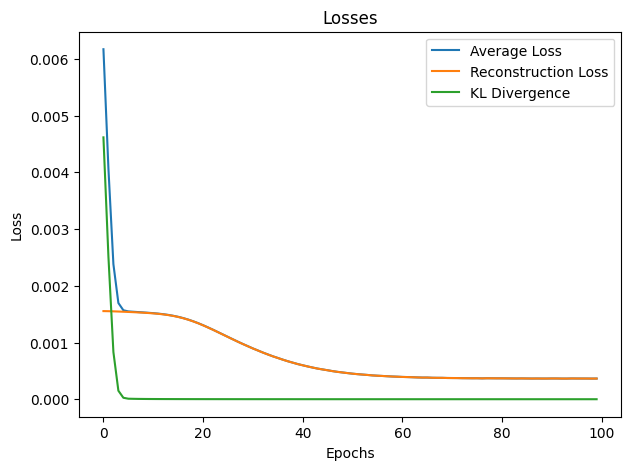

In [22]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

class Encoder(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, latent_dim * 2)  # mean and variance
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=1)
        return mu, log_var


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_shape):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, output_shape),
        )

    def forward(self, z):
        x_reconstructed = self.decoder(z)
        return x_reconstructed


class VAE(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, log_var



# Assuming combined_tensor is your data
# Convert the data to float32
dataset = TensorDataset(normalized_tensor.float())

# Define the data loader
batch_size = 256  # adjust as necessary

# Split data into train, validation, and test
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for testing

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Hyperparameters
input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]  # modify this to match your data
hidden_dim1 = 24  # modify as needed
hidden_dim2 = 48  # modify as needed
hidden_dim3 = 128  # modify as needed
latent_dim = 2  # modify as needed
lr = 5e-5  # learning rate
n_epochs = 100  # modify as needed
beta = 1
    
# Model, optimizer, and loss function
model = VAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)

optimizer = optim.RAdam(model.parameters(), lr=lr)  # Make sure you're using the correct optimizer
loss_fn = nn.MSELoss()  # And the correct loss function


def train(epoch, model, optimizer, loss_fn, train_loader):
    model.train()
    train_loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    for i, batch in enumerate(train_loader):  # using train_loader instead of dataloader
        batch_data = batch[0]  # get the data from the batch
        
        optimizer.zero_grad()

        # Flatten the data
        batch_data = batch_data.view(batch_data.size(0), -1)

        reconstructed_batch, mu, log_var = model(batch_data)

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta*kl_divergence

        loss.backward()
        train_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = total_recon_loss / len(train_loader.dataset)
    avg_kl_div = total_kl_div / len(train_loader.dataset)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')

    return avg_loss, avg_recon_loss, avg_kl_div

    
import matplotlib.pyplot as plt

# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    avg_loss, avg_recon_loss, avg_kl_div = train(epoch, model, optimizer, loss_fn, train_loader)
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss)
    avg_kl_divs.append(avg_kl_div)

# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
def compare_data(data):

    # Get the first row from the dataframe
    first_row = data.iloc[0]

    # Reshape it to (1000, 10)
    reshaped_array = np.reshape(first_row.values, (1000, 2))

    # Convert it back to a dataframe
    reshaped_df = pd.DataFrame(reshaped_array)
    recon_combined_tensor = torch.tensor(reshaped_df.values)
    return recon_combined_tensor

In [23]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)

# 두 데이터 비교

# Flatten the tensors
oriori = compare_data(original_df)
reconrecon = compare_data(reconstructed_df)

# Calculate the Euclidean distance
euclidean_distance = torch.norm(oriori.flatten() - reconrecon.flatten())


print(euclidean_distance)


tensor(24.1263)


In [24]:
## 정규화 다시 되돌리기

reconstructed_arr = np.array(reconrecon)

# Flatten the normalized_arr to 2D
flattened_normalized_arr = reconstructed_arr.reshape(-1, normalized_arr.shape[-1])

# Use the inverse_transform method to transform the data back to its original state
original_arr = scaler.inverse_transform(flattened_normalized_arr)

# Reshape the original data back to the original shape
original_arr = original_arr.reshape(reconstructed_arr.shape)

# Print the shape of original_arr
print(original_arr.shape)
original_df = pd.DataFrame(original_arr)

original_df.shape

replay(original_df)

(1000, 2)


NameError: name 'replay' is not defined

In [36]:
## 정규화 오리지날 데이터 다시 되돌리기

reconstructed_arr = np.array(oriori)

# Flatten the normalized_arr to 2D
flattened_normalized_arr = reconstructed_arr.reshape(-1, normalized_arr.shape[-1])

# Use the inverse_transform method to transform the data back to its original state
original_arr = scaler.inverse_transform(flattened_normalized_arr)

# Reshape the original data back to the original shape
original_arr = original_arr.reshape(reconstructed_arr.shape)

# Print the shape of original_arr
print(original_arr.shape)
original_df = pd.DataFrame(original_arr)

original_df.shape

replay(original_df)

(1000, 2)
0   -0.648839
1   -1.000000
Name: 0, dtype: float32
Creating window glfw
0   -1.0
1   -1.0
Name: 1, dtype: float32


/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Swimmer-v3 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/envs/mujoco/mujoco_env.py:190: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/firstenv/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0   -1.0
1   -1.0
Name: 2, dtype: float32
0   -1.0
1   -1.0
Name: 3, dtype: float32
0   -1.0
1   -1.0
Name: 4, dtype: float32
0   -1.000000
1   -0.430789
Name: 5, dtype: float32
0   -1.000000
1   -0.069674
Name: 6, dtype: float32
0   -0.482194
1    0.733288
Name: 7, dtype: float32
0    0.795897
1    0.954825
Name: 8, dtype: float32
0    1.0
1    1.0
Name: 9, dtype: float32
0    1.0
1    1.0
Name: 10, dtype: float32
0    1.0
1    1.0
Name: 11, dtype: float32
0    1.0
1    1.0
Name: 12, dtype: float32
0    1.0
1    1.0
Name: 13, dtype: float32
0    1.0
1    1.0
Name: 14, dtype: float32
0    1.0
1    1.0
Name: 15, dtype: float32
0    1.0
1    1.0
Name: 16, dtype: float32
0    1.0
1    1.0
Name: 17, dtype: float32
0    1.0
1    1.0
Name: 18, dtype: float32
0    1.000000
1    0.921152
Name: 19, dtype: float32
0    1.000000
1    0.804239
Name: 20, dtype: float32
0    1.000000
1    0.719324
Name: 21, dtype: float32
0    1.000000
1    0.520269
Name: 22, dtype: float32
0    1.000000
1    0.0541

0   -0.857042
1   -1.000000
Name: 177, dtype: float32
0   -0.852103
1   -1.000000
Name: 178, dtype: float32
0   -0.889116
1   -1.000000
Name: 179, dtype: float32
0   -0.97511
1   -1.00000
Name: 180, dtype: float32
0   -1.0
1   -1.0
Name: 181, dtype: float32
0   -0.992059
1   -1.000000
Name: 182, dtype: float32
0   -0.997418
1   -1.000000
Name: 183, dtype: float32
0   -1.0
1   -1.0
Name: 184, dtype: float32
0   -1.0
1   -1.0
Name: 185, dtype: float32
0   -1.0
1   -1.0
Name: 186, dtype: float32
0   -1.0
1   -1.0
Name: 187, dtype: float32
0   -1.0
1   -1.0
Name: 188, dtype: float32
0   -1.0
1   -1.0
Name: 189, dtype: float32
0   -1.000000
1   -0.877354
Name: 190, dtype: float32
0   -1.000000
1   -0.645373
Name: 191, dtype: float32
0   -1.000000
1   -0.191316
Name: 192, dtype: float32
0   -1.000000
1    0.433119
Name: 193, dtype: float32
0    0.194414
1    1.000000
Name: 194, dtype: float32
0    0.860135
1    1.000000
Name: 195, dtype: float32
0    0.953701
1    1.000000
Name: 196, dtype: 

0    0.96999
1    1.00000
Name: 346, dtype: float32
0    0.923807
1    1.000000
Name: 347, dtype: float32
0    1.0
1    1.0
Name: 348, dtype: float32
0    1.0
1    1.0
Name: 349, dtype: float32
0    1.0
1    1.0
Name: 350, dtype: float32
0    1.0
1    1.0
Name: 351, dtype: float32
0    1.0
1    1.0
Name: 352, dtype: float32
0    1.0
1    1.0
Name: 353, dtype: float32
0    1.0
1    1.0
Name: 354, dtype: float32
0    1.000000
1    0.739168
Name: 355, dtype: float32
0    1.000000
1    0.629652
Name: 356, dtype: float32
0    1.000000
1    0.565385
Name: 357, dtype: float32
0    1.000000
1    0.166741
Name: 358, dtype: float32
0    0.967727
1   -0.170781
Name: 359, dtype: float32
0   -0.073084
1   -0.201768
Name: 360, dtype: float32
0   -0.73682
1   -1.00000
Name: 361, dtype: float32
0   -0.838114
1   -1.000000
Name: 362, dtype: float32
0   -0.863123
1   -1.000000
Name: 363, dtype: float32
0   -0.915784
1   -1.000000
Name: 364, dtype: float32
0   -0.996725
1   -1.000000
Name: 365, dtype: fl

0   -1.0
1   -1.0
Name: 516, dtype: float32
0   -1.0
1   -1.0
Name: 517, dtype: float32
0   -1.0
1   -1.0
Name: 518, dtype: float32
0   -1.0
1   -1.0
Name: 519, dtype: float32
0   -1.000000
1   -0.987707
Name: 520, dtype: float32
0   -1.000000
1   -0.727924
Name: 521, dtype: float32
0   -1.000000
1   -0.308105
Name: 522, dtype: float32
0   -1.000000
1    0.233934
Name: 523, dtype: float32
0   -0.15195
1    1.00000
Name: 524, dtype: float32
0    0.753257
1    1.000000
Name: 525, dtype: float32
0    0.944446
1    1.000000
Name: 526, dtype: float32
0    0.982095
1    1.000000
Name: 527, dtype: float32
0    1.0
1    1.0
Name: 528, dtype: float32
0    0.918078
1    1.000000
Name: 529, dtype: float32
0    0.98471
1    1.00000
Name: 530, dtype: float32
0    1.0
1    1.0
Name: 531, dtype: float32
0    1.0
1    1.0
Name: 532, dtype: float32
0    1.0
1    1.0
Name: 533, dtype: float32
0    1.0
1    1.0
Name: 534, dtype: float32
0    1.0
1    1.0
Name: 535, dtype: float32
0    1.0
1    1.0
Name: 

0   -0.919419
1   -1.000000
Name: 688, dtype: float32
0   -0.885176
1   -1.000000
Name: 689, dtype: float32
0   -0.930636
1   -1.000000
Name: 690, dtype: float32
0   -1.0
1   -1.0
Name: 691, dtype: float32
0   -1.0
1   -1.0
Name: 692, dtype: float32
0   -1.0
1   -1.0
Name: 693, dtype: float32
0   -1.0
1   -1.0
Name: 694, dtype: float32
0   -1.0
1   -1.0
Name: 695, dtype: float32
0   -1.0
1   -1.0
Name: 696, dtype: float32
0   -1.0
1   -1.0
Name: 697, dtype: float32
0   -1.0
1   -1.0
Name: 698, dtype: float32
0   -1.0
1   -1.0
Name: 699, dtype: float32
0   -1.0
1   -1.0
Name: 700, dtype: float32
0   -1.00000
1   -0.80582
Name: 701, dtype: float32
0   -1.00000
1   -0.40367
Name: 702, dtype: float32
0   -1.000000
1    0.130358
Name: 703, dtype: float32
0   -0.364486
1    1.000000
Name: 704, dtype: float32
0    0.703468
1    1.000000
Name: 705, dtype: float32
0    0.949135
1    1.000000
Name: 706, dtype: float32
0    0.981117
1    1.000000
Name: 707, dtype: float32
0    1.0
1    1.0
Name: 

0    1.0
1    1.0
Name: 860, dtype: float32
0    1.000000
1    0.818111
Name: 861, dtype: float32
0    1.000000
1    0.589203
Name: 862, dtype: float32
0    1.000000
1    0.555089
Name: 863, dtype: float32
0    1.000000
1    0.270016
Name: 864, dtype: float32
0    1.0000
1   -0.2407
Name: 865, dtype: float32
0    0.118475
1   -0.150631
Name: 866, dtype: float32
0   -0.756815
1   -1.000000
Name: 867, dtype: float32
0   -0.915207
1   -1.000000
Name: 868, dtype: float32
0   -0.890136
1   -1.000000
Name: 869, dtype: float32
0   -0.943293
1   -1.000000
Name: 870, dtype: float32
0   -1.0
1   -1.0
Name: 871, dtype: float32
0   -1.0
1   -1.0
Name: 872, dtype: float32
0   -1.0
1   -1.0
Name: 873, dtype: float32
0   -1.0
1   -1.0
Name: 874, dtype: float32
0   -1.0
1   -1.0
Name: 875, dtype: float32
0   -1.0
1   -1.0
Name: 876, dtype: float32
0   -1.0
1   -1.0
Name: 877, dtype: float32
0   -1.0
1   -1.0
Name: 878, dtype: float32
0   -1.0
1   -1.0
Name: 879, dtype: float32
0   -1.0
1   -1.0
Name: 

# 원래대로

In [ ]:
import torch

# Convert combined_arr to PyTorch Tensor
combined_tensor = torch.from_numpy(combined_arr)

# Print the shape of combined_tensor
print(combined_tensor.shape)

In [ ]:
# import os
# import pandas as pd
# from tqdm import tqdm  # Import tqdm

# output_dir = os.path.join(".", "output")  # Path to the output directory
# subdirs = [f.path for f in os.scandir(output_dir) if f.is_dir()]
# combined_df = pd.DataFrame()

# # Create a tqdm progress bar
# pbar = tqdm(subdirs, desc="Processing subdirectories", unit="subdir")

# for subdir in pbar:
#     action_filename = os.path.join(subdir, "action.csv")
#     obs_filename = os.path.join(subdir, "obs.csv")
#     action_df = pd.read_csv(action_filename)
#     obs_df = pd.read_csv(obs_filename)
#     combined_data = pd.concat([action_df, obs_df], axis=1)
#     if combined_data.shape == (999,10):
#         combined_df = pd.concat([combined_df, combined_data], ignore_index=True)
#     else:
#         print("fail : ", subdir)

#     # Update the progress bar
#     pbar.set_postfix({"Processed subdirectories": subdir})

# # Close the progress bar
# pbar.close()



# VAE code -1

In [108]:
class Encoder(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, latent_dim * 2)  # mean and variance
        )

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=1)
        return mu, log_var


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_shape):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim3),
            nn.ReLU(),
            nn.Linear(hidden_dim3, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, output_shape),
        )

    def forward(self, z):
        x_reconstructed = self.decoder(z)
        return x_reconstructed


class VAE(nn.Module):
    def __init__(self, input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim1, hidden_dim2, hidden_dim3, input_shape)

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, log_var

    
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

# Assuming combined_tensor is your data
# Convert the data to float32
dataset = TensorDataset(combined_tensor.float())

# Define the data loader
batch_size = 256  # adjust as necessary

# Split data into train, validation, and test
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for testing

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Hyperparameters
input_shape = combined_tensor.shape[1] * combined_tensor.shape[2]  # modify this to match your data
hidden_dim1 = 512  # modify as needed
hidden_dim2 = 128  # modify as needed
hidden_dim3 = 24  # modify as needed
latent_dim = 2  # modify as needed
lr = 1e-3  # learning rate
n_epochs = 100  # modify as needed
beta = 0.2
    
# Model, optimizer, and loss function
model = VAE(input_shape, hidden_dim1, hidden_dim2, hidden_dim3, latent_dim)

optimizer = optim.Adam(model.parameters(), lr=lr)  # Make sure you're using the correct optimizer
loss_fn = nn.MSELoss()  # And the correct loss function


def train(epoch, model, optimizer, loss_fn, train_loader):
    model.train()
    train_loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    for i, batch in enumerate(train_loader):  # using train_loader instead of dataloader
        batch_data = batch[0]  # get the data from the batch
        
        optimizer.zero_grad()

        # Flatten the data
        batch_data = batch_data.view(batch_data.size(0), -1)

        reconstructed_batch, mu, log_var = model(batch_data)

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta*kl_divergence

        loss.backward()
        train_loss += loss.item()
        total_recon_loss += recon_loss.item()
        total_kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = total_recon_loss / len(train_loader.dataset)
    avg_kl_div = total_kl_div / len(train_loader.dataset)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss}, Recon Loss: {avg_recon_loss}, KL Div: {avg_kl_div}')

    return avg_loss, avg_recon_loss, avg_kl_div

    
import matplotlib.pyplot as plt

# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    avg_loss, avg_recon_loss, avg_kl_div = train(epoch, model, optimizer, loss_fn, train_loader)
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss)
    avg_kl_divs.append(avg_kl_div)

# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


====> Epoch: 1 Average loss: 0.022717866352626254, Recon Loss: 0.008911648716245378, KL Div: 0.0690310868876321
====> Epoch: 2 Average loss: 0.009382953643798828, Recon Loss: 0.008009764569146293, KL Div: 0.006865945679800851
====> Epoch: 3 Average loss: 0.00890677285194397, Recon Loss: 0.008028668625014168, KL Div: 0.004390521151678903
====> Epoch: 4 Average loss: 0.008549687010901315, Recon Loss: 0.008028507402965, KL Div: 0.0026058978693825857
====> Epoch: 5 Average loss: 0.008260311654635838, Recon Loss: 0.00796705504826137, KL Div: 0.001466283014842442
====> Epoch: 6 Average loss: 0.008176799433571951, Recon Loss: 0.008019766398838588, KL Div: 0.0007851654802049909
====> Epoch: 7 Average loss: 0.008066347530909948, Recon Loss: 0.00798635252884456, KL Div: 0.00039997482299804687
====> Epoch: 8 Average loss: 0.008061358434813364, Recon Loss: 0.008022653528622218, KL Div: 0.00019352446283612933
====> Epoch: 9 Average loss: 0.008056209717478072, Recon Loss: 0.00803847348690033, KL Div

[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

In [ ]:
def evaluate(model, loss_fn, dataloader):
    model.eval()
    loss = 0
    total_recon_loss = 0
    total_kl_div = 0
    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            batch_data = batch[0]  # get the data from the batch

            # Flatten the data
            batch_data = batch_data.view(batch_data.size(0), -1)

            reconstructed_batch, mu, log_var = model(batch_data)

            # Loss: reconstruction loss + KL divergence
            recon_loss = loss_fn(reconstructed_batch, batch_data)
            kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            loss += recon_loss + kl_divergence
            total_recon_loss += recon_loss.item()
            total_kl_div += kl_divergence.item()

    avg_loss = loss / len(dataloader.dataset)
    avg_recon_loss = total_recon_loss / len(dataloader.dataset)
    avg_kl_div = total_kl_div / len(dataloader.dataset)

    return avg_loss, avg_recon_loss, avg_kl_div

In [ ]:
evaluate(model, loss_fn, test_loader)

In [ ]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)

# 두 데이터 비교

# Flatten the tensors
oriori = compare_data(original_df)
reconrecon = compare_data(reconstructed_df)

# Calculate the Euclidean distance
euclidean_distance = torch.norm(oriori.flatten() - reconrecon.flatten())


print(euclidean_distance)



# rvae

In [109]:
class RVAE_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, latent_dim):
        super(RVAE_Encoder, self).__init__()
        self.rnn = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_var = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        _, hidden = self.rnn(x)
        hidden = hidden[-1]
        mu = self.fc_mu(hidden)
        log_var = self.fc_var(hidden)
        return mu, log_var

class RVAE_Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, num_layers, output_dim, seq_length):
        super(RVAE_Decoder, self).__init__()
        self.fc = nn.Linear(latent_dim, hidden_dim)
        self.rnn = nn.GRU(hidden_dim, output_dim, num_layers=num_layers, batch_first=True)
        self.seq_length = seq_length

    def forward(self, z):
        h = F.relu(self.fc(z))
        h = h.unsqueeze(0).repeat(self.seq_length, 1, 1) 
        out, _ = self.rnn(h)
        return out

class R_VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, latent_dim, output_dim, seq_length):
        super(R_VAE, self).__init__()
        self.encoder = RVAE_Encoder(input_dim, hidden_dim, num_layers, latent_dim)
        self.decoder = RVAE_Decoder(latent_dim, hidden_dim, num_layers, output_dim, seq_length)

    def forward(self, x):
        mu, log_var = self.encoder(x)
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = eps.mul(std).add_(mu)
        x = self.decoder(z)
        return x, mu, log_var

====> Epoch:1 Average loss:0.024795423337391445, Recon Loss:0.0007828651578165591, KL Div:0.013808902646814074
====> Epoch:2 Average loss:0.01675598164967128, Recon Loss:0.0007798118749633431, KL Div:0.0058053941173212865
====> Epoch:3 Average loss:0.014087305239268712, Recon Loss:0.0007755582919344306, KL Div:0.0031837584120886666
====> Epoch:4 Average loss:0.012621038505009242, Recon Loss:0.0007750183576717973, KL Div:0.001760957326207842
====> Epoch:5 Average loss:0.011843462467193604, Recon Loss:0.0007722571026533842, KL Div:0.0010228096885340555
====> Epoch:6 Average loss:0.011416398354939052, Recon Loss:0.0007701175636611879, KL Div:0.0006308022822652544
====> Epoch:7 Average loss:0.011158067328589304, Recon Loss:0.0007672447245568037, KL Div:0.0004015212527343205
====> Epoch:8 Average loss:0.010998882225581577, Recon Loss:0.0007657725363969803, KL Div:0.00026690470746585304
====> Epoch:9 Average loss:0.010903707197734288, Recon Loss:0.0007647138554602861, KL Div:0.00018887831057

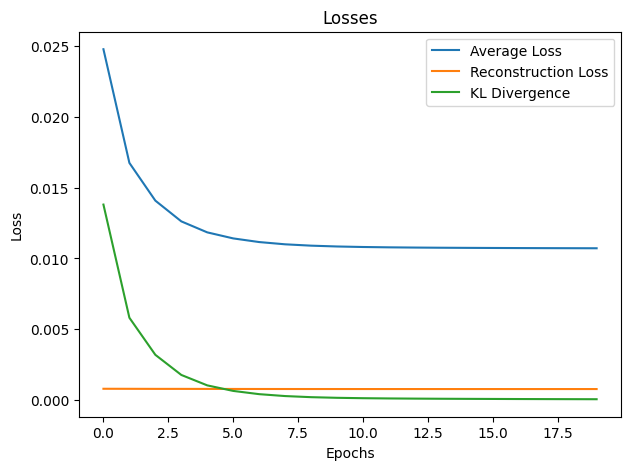

In [110]:


import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split

# Hyperparameters
input_dim = 10  # modify this to match your data
hidden_dim = 24  # modify as needed
num_layers = 2  # modify as needed
latent_dim = 2  # modify as needed
output_dim = 10  # modify as needed
lr = 5e-4  # learning rate
n_epochs = 20  # modify as needed
beta = 1


# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []


# Model, optimizer, and loss function
seq_length = 1000  # Set sequence length to match your target data
model = R_VAE(input_dim, hidden_dim, num_layers, latent_dim, output_dim, seq_length)

# Add seq_length here
optimizer = optim.RAdam(model.parameters(), lr=lr)  # Make sure you're using the correct optimizer
loss_fn = nn.MSELoss()  # And the correct loss function

def train(epoch, model, optimizer, loss_fn, train_loader):
    model.train()
    train_loss = 0
    recon_loss = 0
    kl_div = 0
    for batch_idx, batch in enumerate(train_loader):
        batch_data = batch[0]  # get the data from the batch

        optimizer.zero_grad()

        reconstructed_batch, mu, log_var = model(batch_data)
        reconstructed_batch = reconstructed_batch.permute(1, 0, 2)

#         print("Input size: ", batch_data.size())  # Print input size
#         print("Output size: ", reconstructed_batch.size())  # Print output size

        # Loss: reconstruction loss + KL divergence
        recon_loss = loss_fn(reconstructed_batch, batch_data)
        kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        loss = recon_loss + beta*kl_divergence

        loss.backward()
        train_loss += loss.item()
        recon_loss += recon_loss.item()
        kl_div += kl_divergence.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    avg_recon_loss = recon_loss / len(train_loader.dataset)
    avg_kl_div = kl_div / len(train_loader.dataset)
    print(f'====> Epoch:{epoch} Average loss:{avg_loss}, Recon Loss:{avg_recon_loss}, KL Div:{avg_kl_div}')
    return avg_loss, avg_recon_loss, avg_kl_div


# Lists to store losses for each epoch
avg_losses = []
avg_recon_losses = []
avg_kl_divs = []

# Training
for epoch in range(1, n_epochs + 1):
    avg_loss, avg_recon_loss, avg_kl_div = train(epoch, model, optimizer, loss_fn, train_loader)
    avg_losses.append(avg_loss)
    avg_recon_losses.append(avg_recon_loss.item())
    avg_kl_divs.append(avg_kl_div)

# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

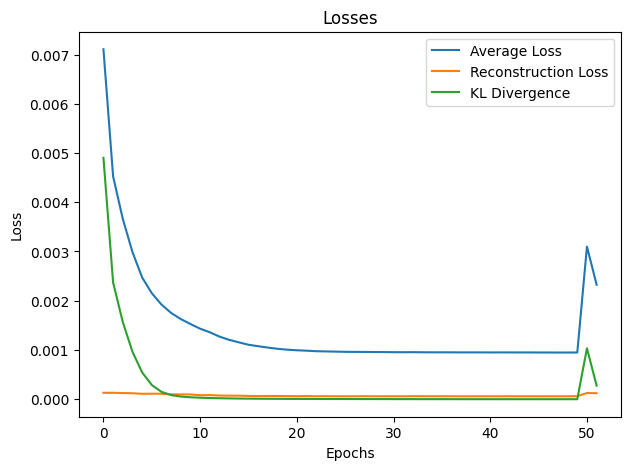

In [87]:
# Plot the losses
plt.figure(figsize=(7,5))
plt.plot(avg_losses, label='Average Loss')
plt.plot(avg_recon_losses, label='Reconstruction Loss')  # 수정된 부분
plt.plot(avg_kl_divs, label='KL Divergence')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting latent space

First 10 points in latent space:  tensor([[-0.0089, -0.0050],
        [-0.0100, -0.0032],
        [-0.0003,  0.0022],
        [ 0.0030, -0.0014],
        [ 0.0015, -0.0110],
        [-0.0004,  0.0037],
        [-0.0021,  0.0007],
        [-0.0032,  0.0053],
        [ 0.0029, -0.0056],
        [ 0.0049, -0.0071]])


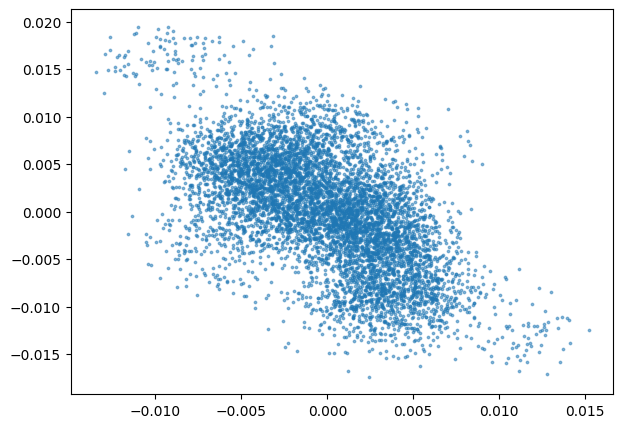

In [111]:
#right

def visualize_latent_space(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents)
    print("First 10 points in latent space: ", latents[:10])  # Print the first 10 points
    plt.figure(figsize=(7, 5))
    plt.scatter(latents[:, 0], latents[:, 1], alpha=0.5, s=3)
    plt.show()

# Visualize the latent space
visualize_latent_space(model, train_loader)


First 10 points in latent space:  tensor([[-1.3661e-03,  1.8495e-03],
        [ 4.0335e-03,  4.4838e-04],
        [ 2.1654e-03, -1.2239e-03],
        [-2.6562e-04,  3.7198e-03],
        [-1.6902e-03,  1.6438e-03],
        [-1.1766e-03, -1.1536e-03],
        [-7.2140e-05, -2.3508e-03],
        [ 8.4873e-05, -2.4171e-04],
        [-8.3761e-04, -1.7419e-03],
        [ 3.7915e-03,  1.9156e-03]])


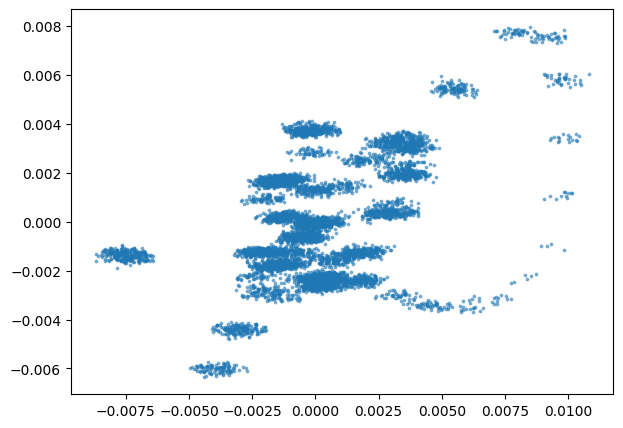

In [77]:
#front

def visualize_latent_space(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents)
    print("First 10 points in latent space: ", latents[:10])  # Print the first 10 points
    plt.figure(figsize=(7, 5))
    plt.scatter(latents[:, 0], latents[:, 1], alpha=0.5, s = 3)
    plt.show()

# Visualize the latent space
visualize_latent_space(model, train_loader)


First 10 points in latent space:  tensor([[-0.0010, -0.0007],
        [-0.0050,  0.0008],
        [-0.0013, -0.0002],
        [ 0.0027, -0.0016],
        [-0.0034, -0.0008],
        [ 0.0030,  0.0030],
        [-0.0030, -0.0014],
        [-0.0010, -0.0010],
        [ 0.0016,  0.0021],
        [-0.0033, -0.0005]])


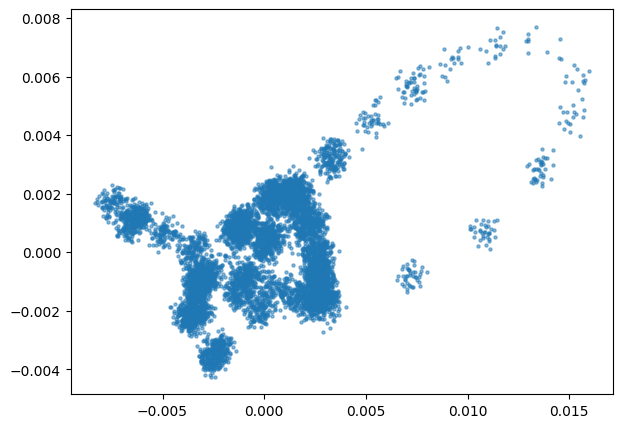

In [48]:
#back

def visualize_latent_space(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents)
    print("First 10 points in latent space: ", latents[:10])  # Print the first 10 points
    plt.figure(figsize=(7, 5))
    plt.scatter(latents[:, 0], latents[:, 1], alpha=0.5, s=5)
    plt.show()

# Visualize the latent space
visualize_latent_space(model, train_loader)


First 10 points in latent space:  tensor([[-0.0012,  0.0002],
        [ 0.0002, -0.0010],
        [ 0.0007,  0.0015],
        [ 0.0013, -0.0018],
        [ 0.0009,  0.0020],
        [-0.0015,  0.0003],
        [-0.0004,  0.0024],
        [ 0.0001, -0.0003],
        [ 0.0023, -0.0015],
        [-0.0008, -0.0002]])


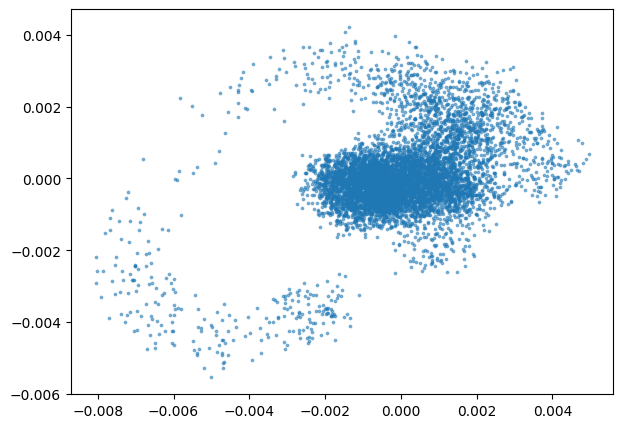

In [91]:
#dance

def visualize_latent_space(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents)
    print("First 10 points in latent space: ", latents[:10])  # Print the first 10 points
    plt.figure(figsize=(7, 5))
    plt.scatter(latents[:, 0], latents[:, 1], alpha=0.5, s=3)
    plt.show()

# Visualize the latent space
visualize_latent_space(model, train_loader)


# UMAP

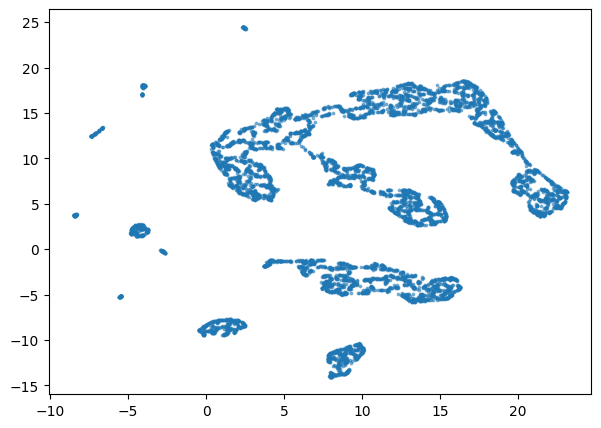

In [62]:
#backward

import umap

def visualize_latent_space_umap(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for UMAP
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=3)
    plt.show()

# Visualize the latent space with UMAP
visualize_latent_space_umap(model, train_loader)


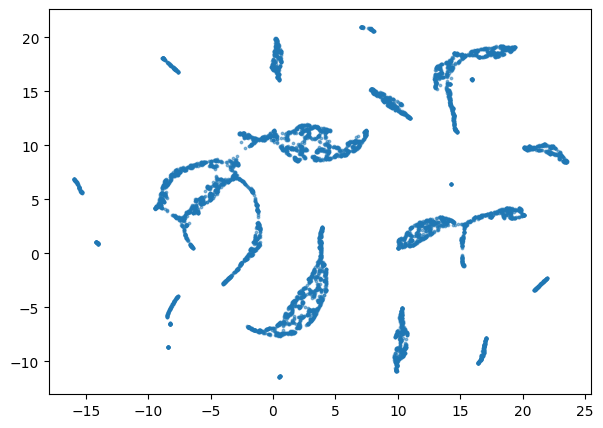

In [78]:
#front

import umap

def visualize_latent_space_umap(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for UMAP
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=3)
    plt.show()

# Visualize the latent space with UMAP
visualize_latent_space_umap(model, train_loader)


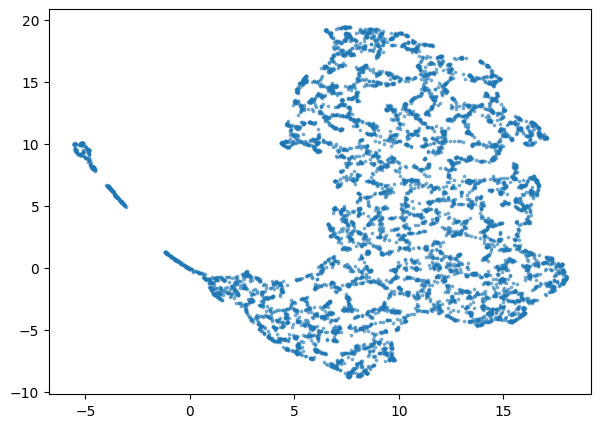

In [92]:
#dance

import umap

def visualize_latent_space_umap(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for UMAP
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=3)
    plt.show()

# Visualize the latent space with UMAP
visualize_latent_space_umap(model, train_loader)


# HeatMap

In [60]:
# backward
import seaborn as sns
import numpy as np

def visualize_latent_space_heatmap(model, data_loader):
    model.eval()
    latents = []
    with torch.no_grad():
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()
    n = int(np.sqrt(latents.shape[0]))  # if latents form a square grid
    latents = latents.reshape((n, n))  # reshape to a grid if your data is grid-like
    sns.heatmap(latents)
    plt.show()

visualize_latent_space_heatmap(model, train_loader)


ValueError: cannot reshape array of size 14000 into shape (83,83)

# pca

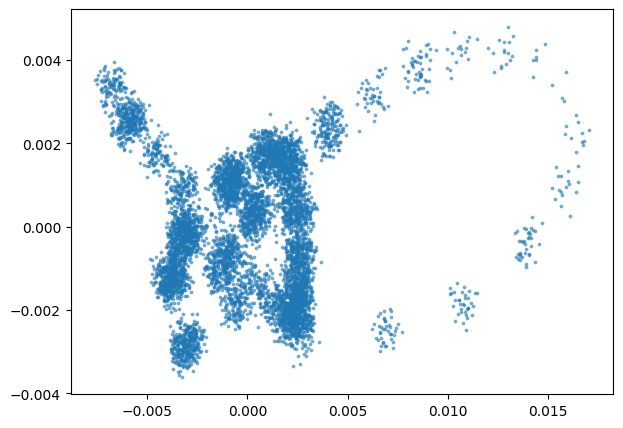

In [61]:
# backward

from sklearn.decomposition import PCA

def visualize_latent_space_pca(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, s = 3)
    plt.show()

# Visualize the latent space with PCA
visualize_latent_space_pca(model, train_loader)


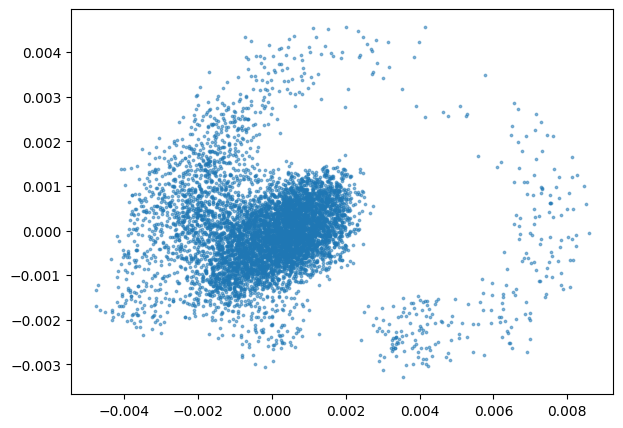

In [93]:
# dance

from sklearn.decomposition import PCA

def visualize_latent_space_pca(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, s = 3)
    plt.show()

# Visualize the latent space with PCA
visualize_latent_space_pca(model, train_loader)


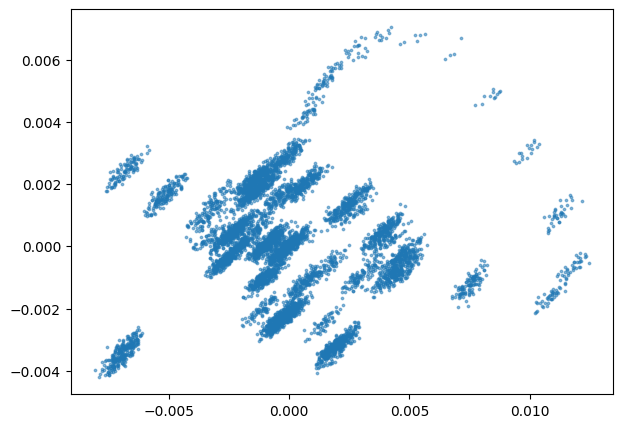

In [79]:
# front

from sklearn.decomposition import PCA

def visualize_latent_space_pca(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, s = 3)
    plt.show()

# Visualize the latent space with PCA
visualize_latent_space_pca(model, train_loader)


# t-sne

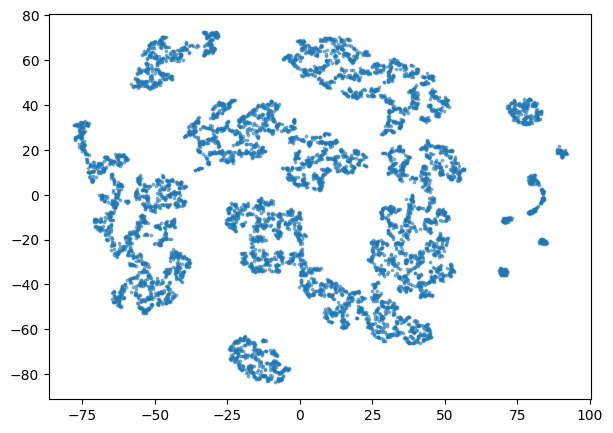

In [56]:
# backward

from sklearn.manifold import TSNE

def visualize_latent_space_tsne(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for t-SNE
    tsne = TSNE(n_components=2)
    tsne_results = tsne.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5, s =3 )
    plt.show()

# Visualize the latent space with t-SNE
visualize_latent_space_tsne(model, train_loader)


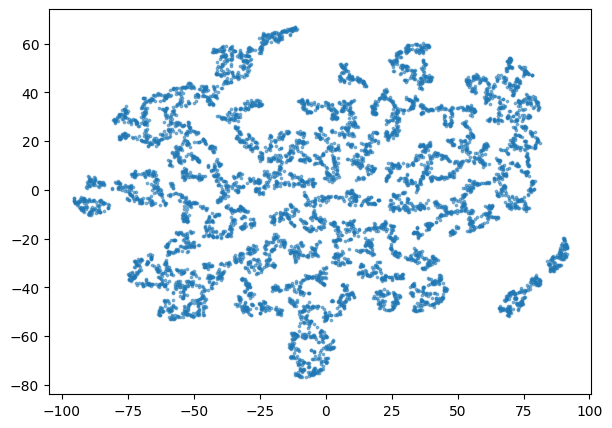

In [94]:
# dance

# backward

from sklearn.manifold import TSNE

def visualize_latent_space_tsne(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for t-SNE
    tsne = TSNE(n_components=2)
    tsne_results = tsne.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5, s =3 )
    plt.show()

# Visualize the latent space with t-SNE
visualize_latent_space_tsne(model, train_loader)


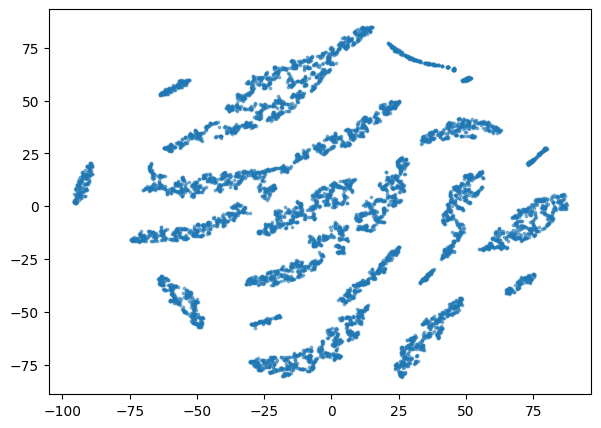

In [80]:
# front

from sklearn.manifold import TSNE

def visualize_latent_space_tsne(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    latents = []
    with torch.no_grad():  # No need to track the gradients
        for batch_idx, batch in enumerate(data_loader):
            batch_data = batch[0]  # get the data from the batch
            mu, _ = model.encoder(batch_data)
            latents.append(mu)
    latents = torch.cat(latents).numpy()  # Convert to numpy array for t-SNE
    tsne = TSNE(n_components=2)
    tsne_results = tsne.fit_transform(latents)
    plt.figure(figsize=(7, 5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5, s =3 )
    plt.show()

# Visualize the latent space with t-SNE
visualize_latent_space_tsne(model, train_loader)


# see the output

In [73]:
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            batch_data = batch[0]  # get the data from the batch
            batch_data = batch_data.view(batch_data.size(0), -1)  # flatten the data
            reconstructed_batch, _, _ = model(batch_data)  # get reconstructed data from the model

            # Convert tensors to numpy arrays for use in pandas
            original_data = batch_data.detach().cpu().numpy()
            reconstructed_data = reconstructed_batch.detach().cpu().numpy()

            # Convert to dataframes
            original_df = pd.DataFrame(original_data)
            reconstructed_df = pd.DataFrame(reconstructed_data)

            if i == 0:  # for the first iteration, create the dataframes
                all_original_df = original_df
                all_reconstructed_df = reconstructed_df
            else:  # for subsequent iterations, append to the existing dataframes
                all_original_df = pd.concat([all_original_df, original_df])
                all_reconstructed_df = pd.concat([all_reconstructed_df, reconstructed_df])
    
    return all_original_df, all_reconstructed_df

# Call the function after training
original_df, reconstructed_df = test_model(model, test_loader)


RuntimeError: input.size(-1) must be equal to input_size. Expected 2, got 2000

In [ ]:
original_df

In [ ]:
reconstructed_df

In [ ]:
def compare_data(data):

    # Get the first row from the dataframe
    first_row = data.iloc[0]

    # Reshape it to (1000, 10)
    reshaped_array = np.reshape(first_row.values, (1000, 2))

    # Convert it back to a dataframe
    reshaped_df = pd.DataFrame(reshaped_array)
    recon_combined_tensor = torch.tensor(reshaped_df.values)
    return recon_combined_tensor

In [ ]:

# Get the first row from the dataframe
first_row = reconstructed_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_array = np.reshape(first_row.values, (1000, 2))

# Convert it back to a dataframe
reshaped_df = pd.DataFrame(reshaped_array)
recon_combined_tensor = torch.tensor(reshaped_df.values)


In [ ]:
replay(reshaped_df)

In [ ]:
# Get the first row from the dataframe
first_row = original_df.iloc[0]

# Reshape it to (1000, 10)
reshaped_array = np.reshape(first_row.values, (1000, 2))

# Convert it back to a dataframe
reshaped_df = pd.DataFrame(reshaped_array)
ori_combined_tensor = torch.tensor(reshaped_df.values)


In [ ]:
replay(reshaped_df)

In [ ]:
recon_combined_tensor-ori_combined_tensor

In [ ]:
# Flatten the tensors
flattened_ori = ori_combined_tensor.flatten()
flattened_recon = recon_combined_tensor.flatten()

# Calculate the Euclidean distance
euclidean_distance = torch.norm(flattened_ori - flattened_recon)


print(euclidean_distance)


In [ ]:
# 두 데이터 비교

# Flatten the tensors
oriori = compare_data(original_df)
reconrecon = compare_data(reconstructed_df)

# Calculate the Euclidean distance
euclidean_distance = torch.norm(oriori.flatten() - reconrecon.flatten())


print(euclidean_distance)


# render with action

In [26]:

import torch

# Convert combined_arr to PyTorch Tensor
# combined_tensor = torch.from_numpy(combined_arr)

# Print the shape of combined_tensor
print(combined_tensor.shape)

import matplotlib.pyplot as plt
from IPython import display
import gym


def replay(combined_data):

    action_sp = combined_data.iloc[:]
    env = gym.make('Swimmer-v3', render_mode = 'human')

    # Iterate through the rows
    for i in range(len(action_sp)):
        # Get the i-th row
        action = action_sp.iloc[i]
        print(action)

        # If this is the first iteration, set the environment state to the given observation
        # Note: This assumes that the observation you've stored is the entire state that can be set with `env.reset()`
        # If this is not the case, you cannot simply set the environment state to the observation
        if i == 0:
            env.reset()  # We ignore the initial observation returned by `reset`

        # Apply the action
        next_observation, reward, done, trunc, info = env.step(action)
        # Render the environment
        env.render()
        # If you want to slow down each step for viewing, you can use time.sleep
        # time.sleep(0.01)

    # Close the environment
    env.close()


torch.Size([10000, 1000, 2])


In [ ]:
action_sp